In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
# Load the dataset
dataset_path = 'heart.csv'
df = pd.read_csv(dataset_path)

In [ ]:
# Drop rows with missing values
penguins = df.dropna()

# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 1. Visualization





## Geometric Projection Techniques

*   Scatter Plot Matrix

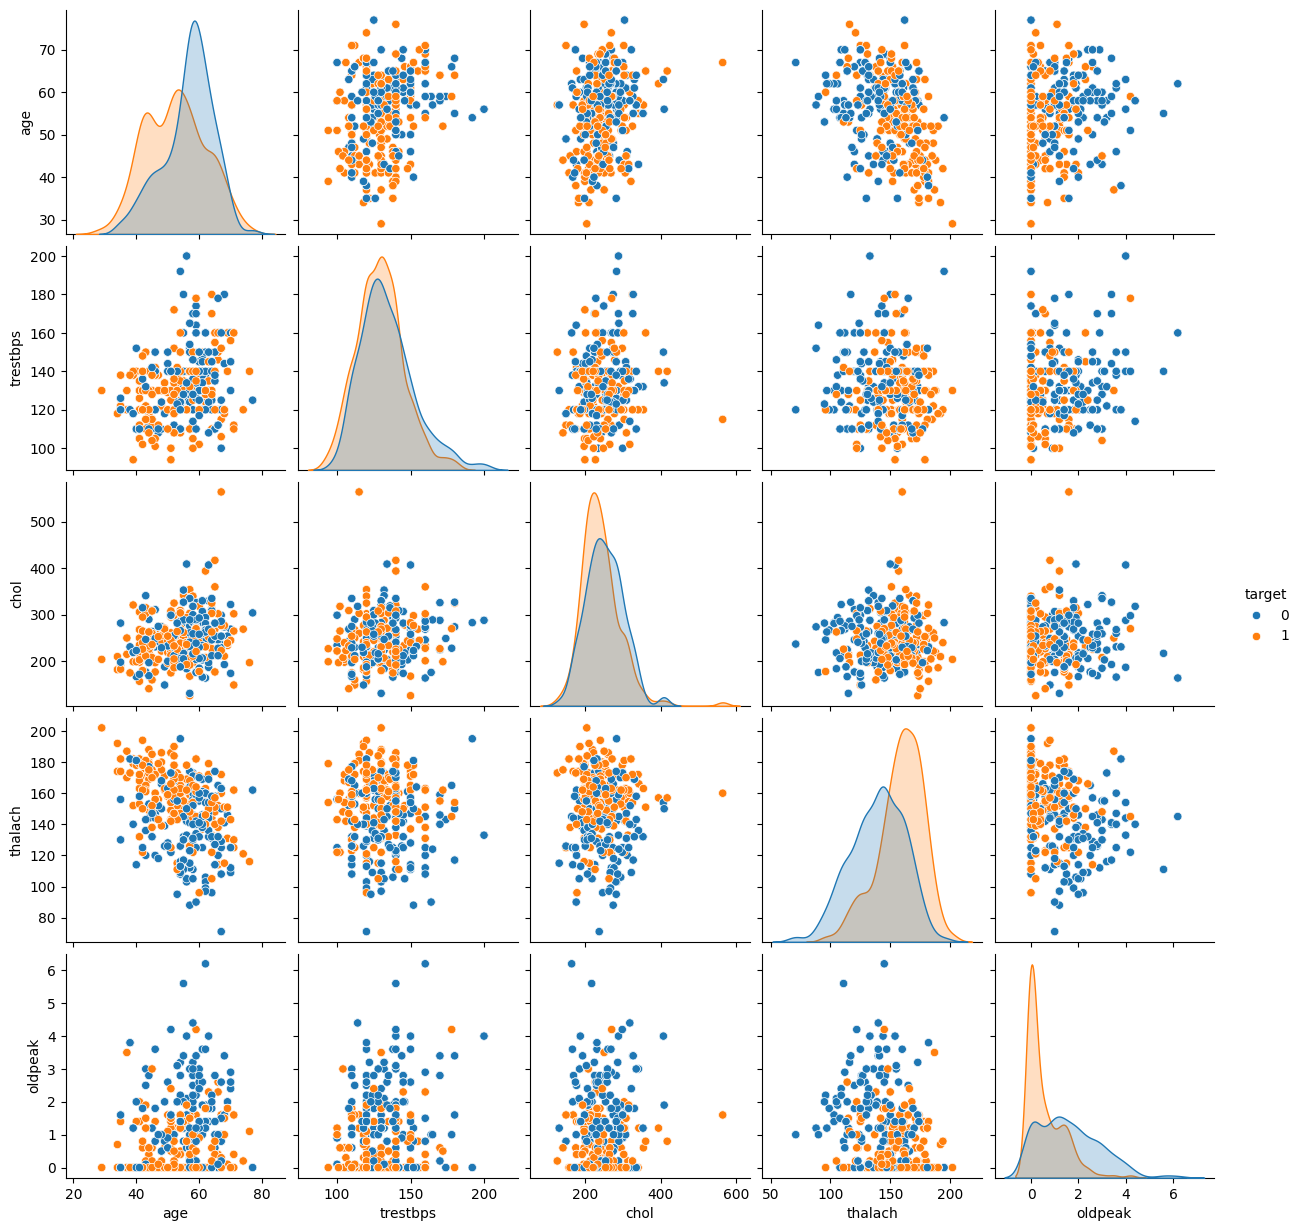

In [ ]:
# Select the features to include in the scatter plot matrix
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

# Create a pairplot
sns.pairplot(df[selected_features], hue='target', diag_kind='kde')

# Display the plot
plt.show()


Here we cannot see any distinguishable clusters in scatter plot for selected numarical features. as the when using hue=target. This suggests that the selected numarical features do not clearly separate individuals with heart disease from those without heart disease based on the plotted data.

So lets try hue=sex.

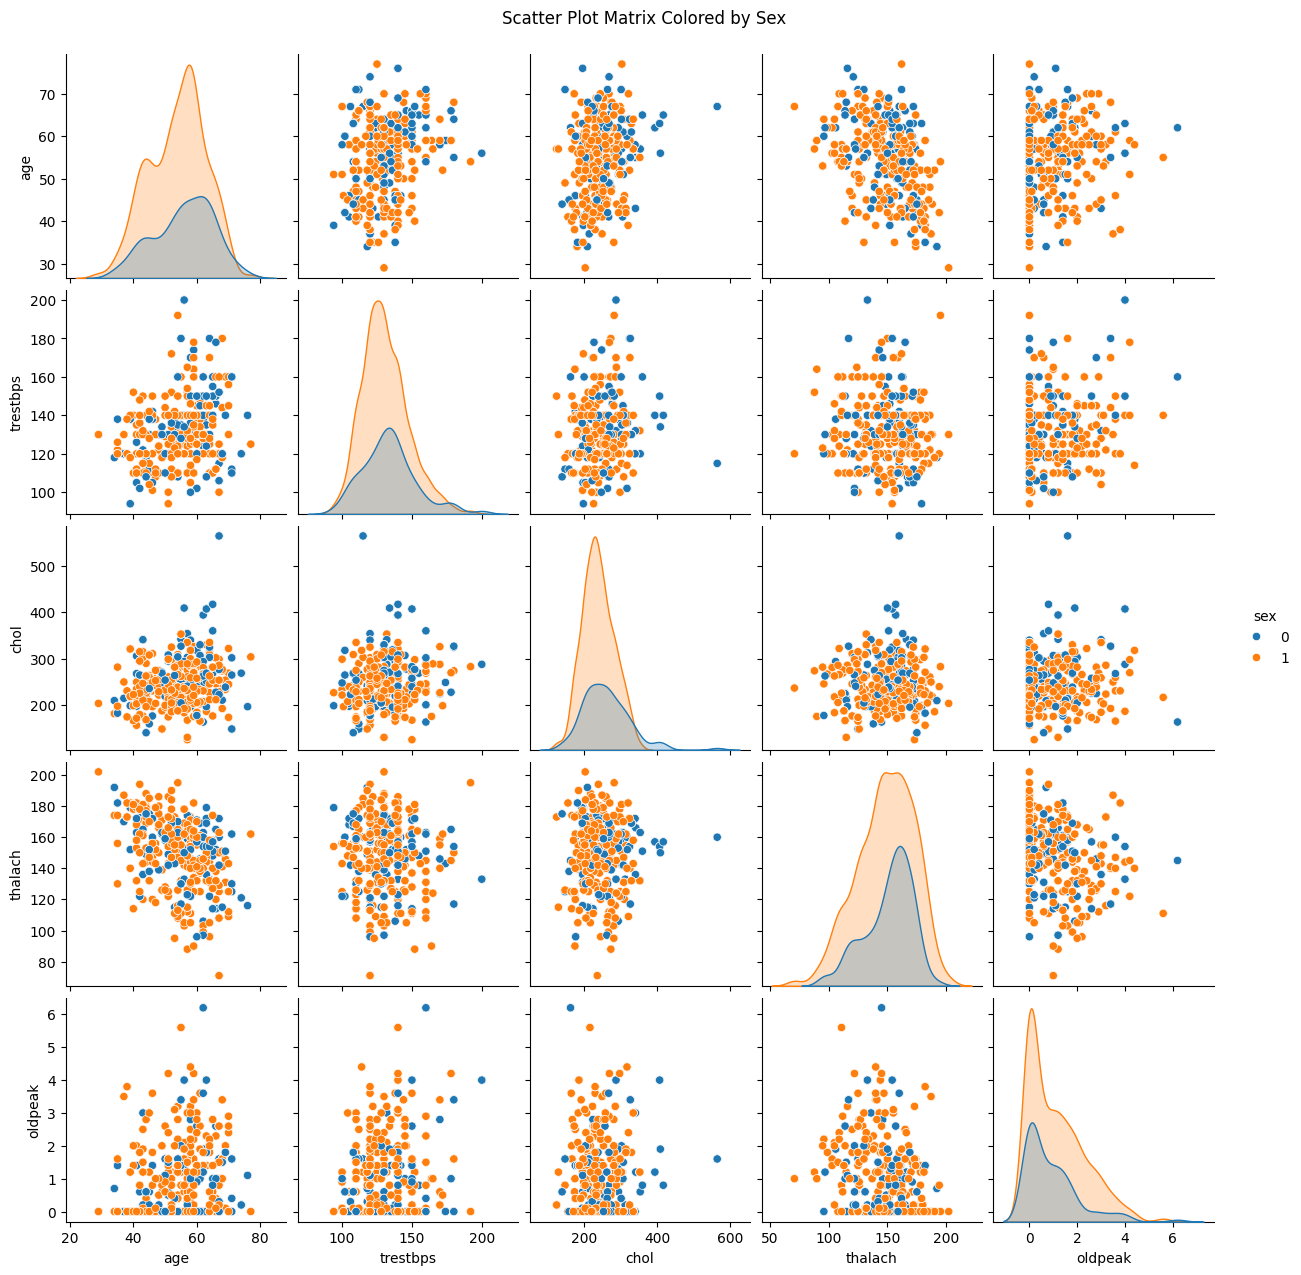

In [ ]:

# Selecting numeric features only for the plot
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
sns.pairplot(df, vars=numeric_features, hue='sex', diag_kind='kde')

# Show the plot
plt.suptitle("Scatter Plot Matrix Colored by Sex", y=1.02)
plt.show()

Here also we cannot see any distinguishable clusters in scatter plot for selected numarical features. as the when using hue=sex.



*   Terills Diaplay



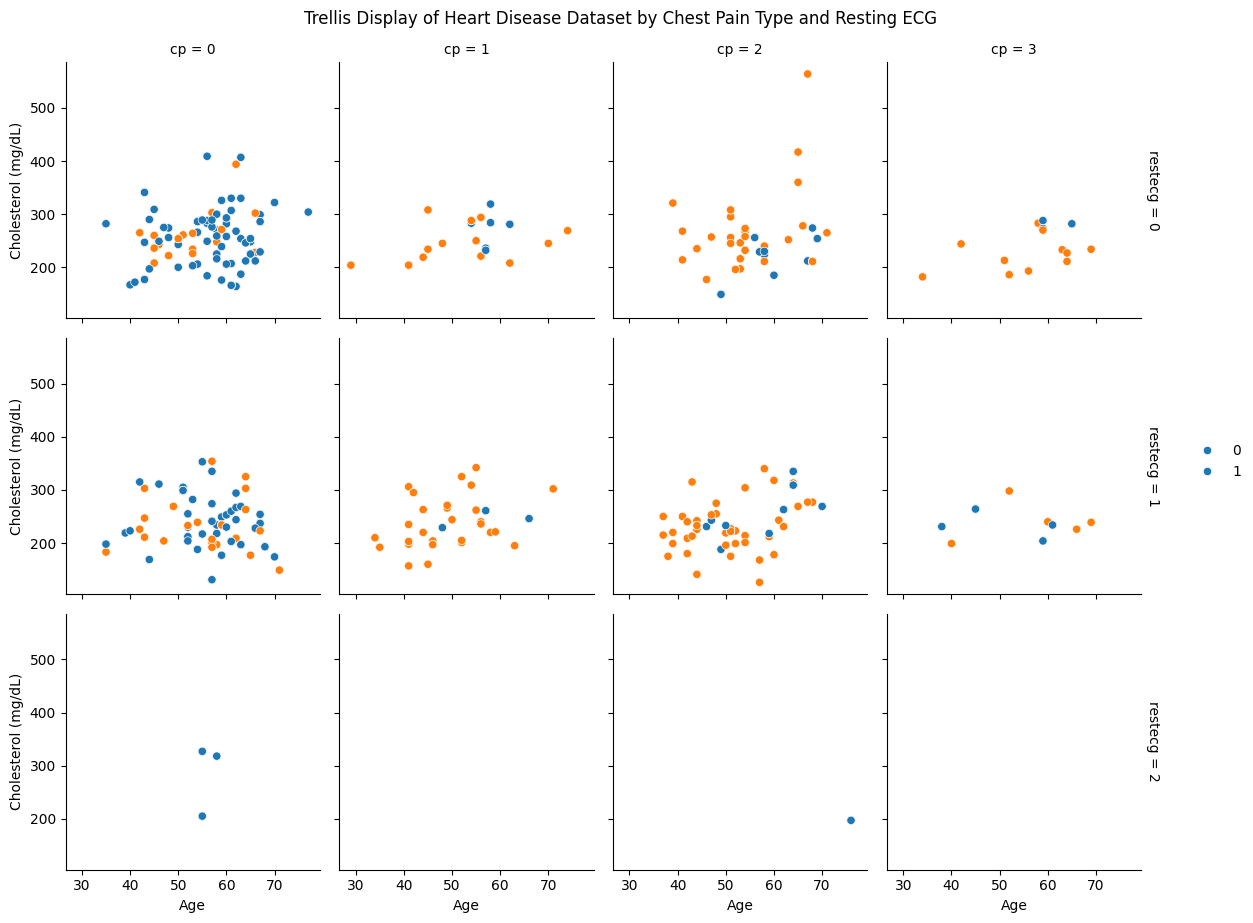

In [ ]:
#Create a Trellis Display (FacetGrid)
g = sns.FacetGrid(df, col='cp', row='restecg', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='age', y='chol', hue='target')
g.set_axis_labels('Age', 'Cholesterol (mg/dL)')
g.add_legend()

# Add a title
plt.suptitle('Trellis Display of Heart Disease Dataset by Chest Pain Type and Resting ECG', y=1.02)
plt.show()

Here it is observable that patients with cp=1,cp=2, cp=3 with restecg =0, restecg=1 have high chance having heart disease in all ages. people with very low cp level and vary high restecg have low changce of getting heart disease.

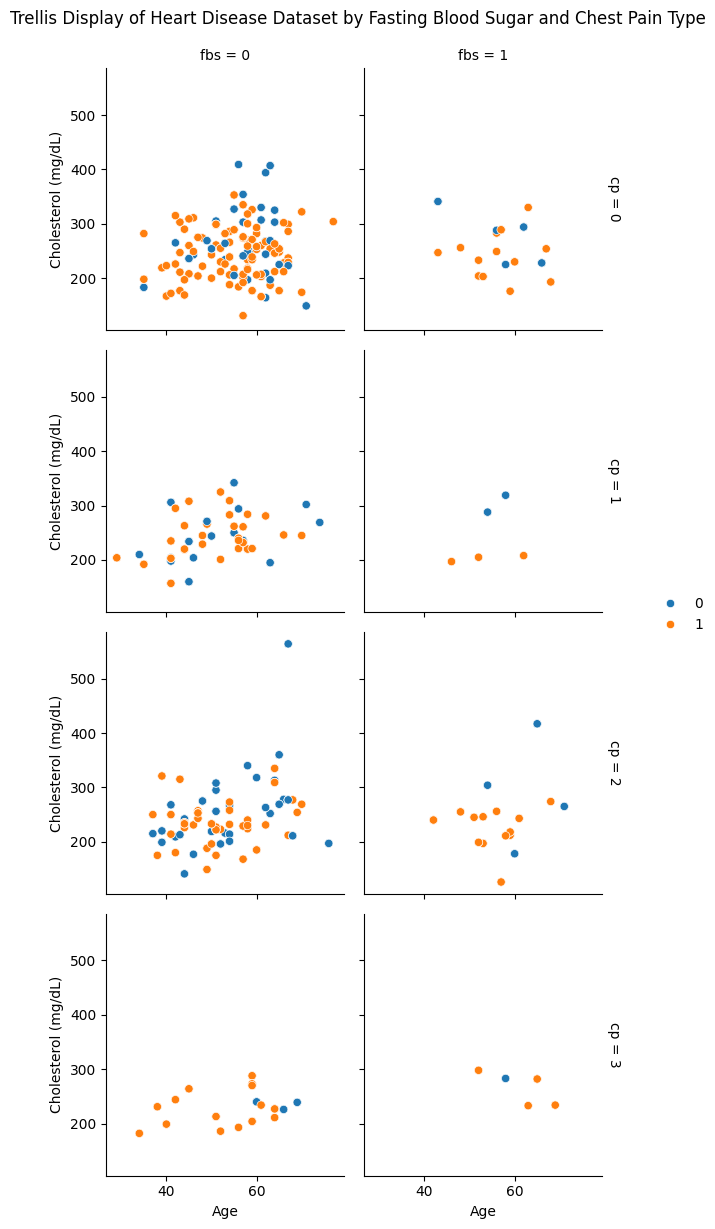

In [ ]:
# Create a Trellis Display for 'fbs'
g = sns.FacetGrid(df, col='fbs', row='cp', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='age', y='chol', hue='sex')
g.set_axis_labels('Age', 'Cholesterol (mg/dL)')
g.add_legend()

# Add a title
plt.suptitle('Trellis Display of Heart Disease Dataset by Fasting Blood Sugar and Chest Pain Type', y=1.02)
plt.show()

Not much of a different can observe here.

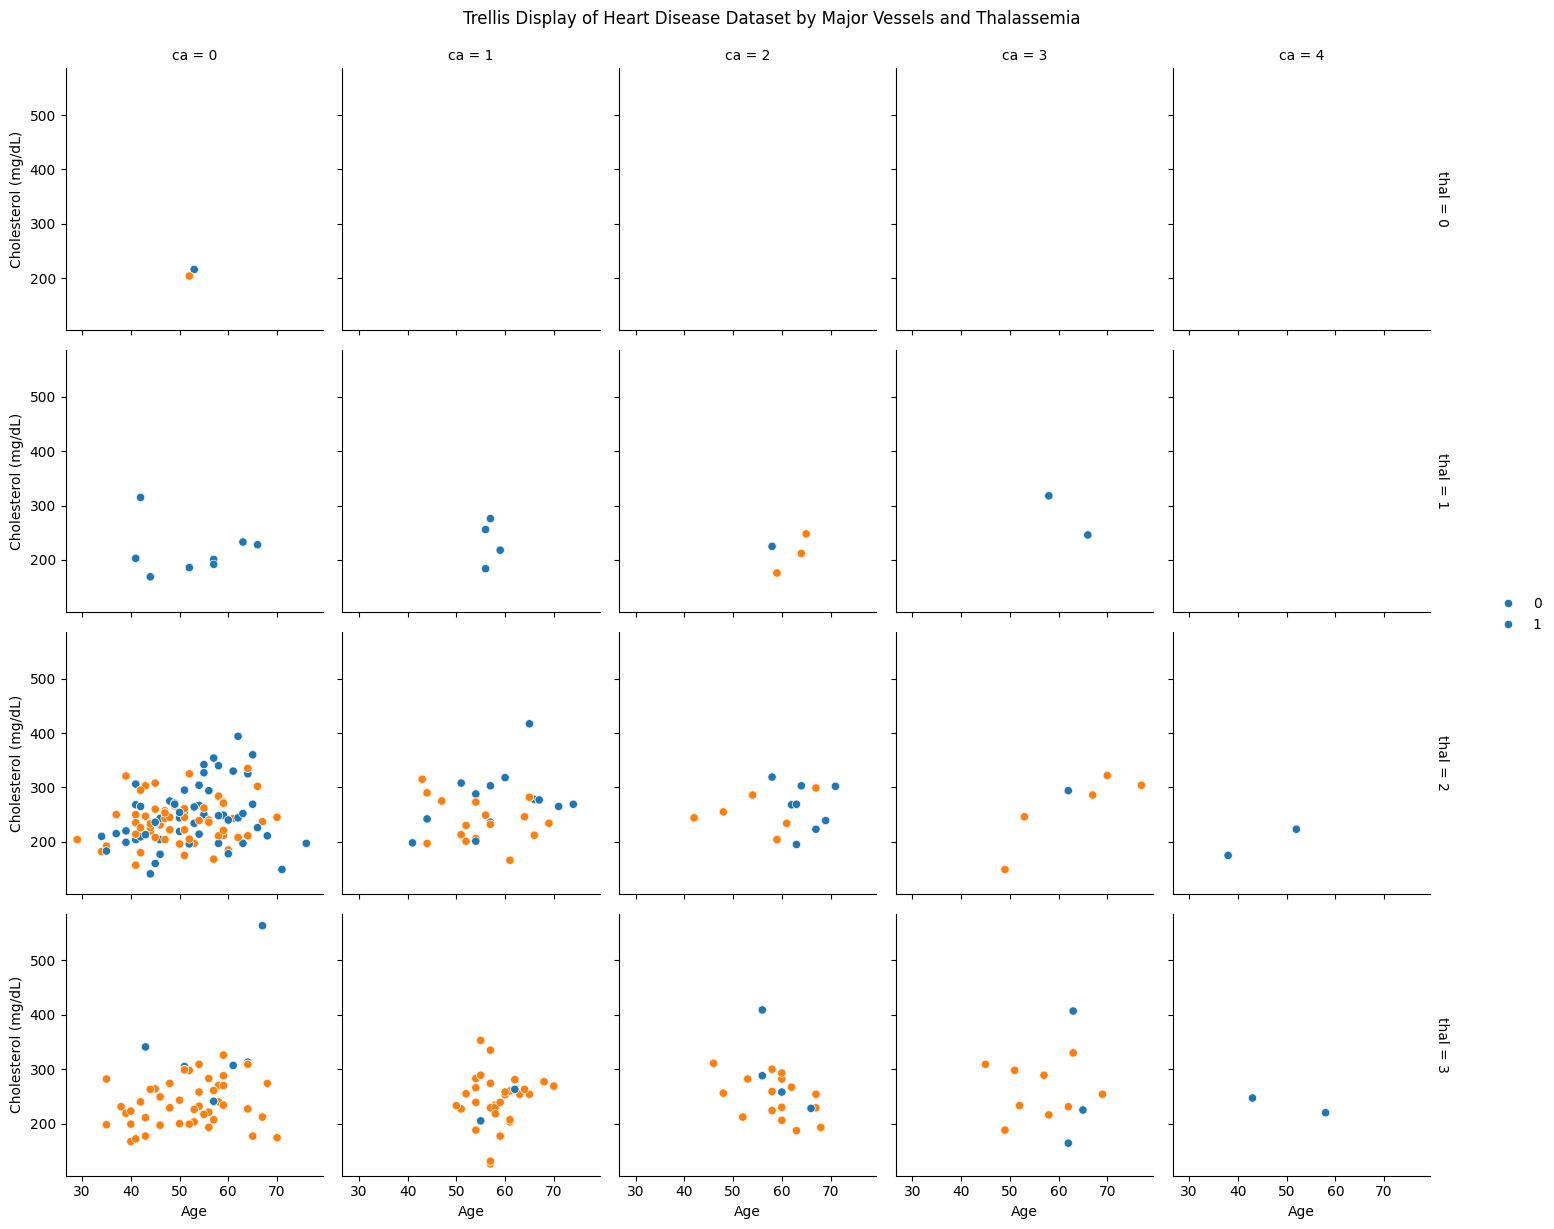

In [ ]:
g = sns.FacetGrid(df, col='ca', row='thal', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='age', y='chol', hue='sex')
g.set_axis_labels('Age', 'Cholesterol (mg/dL)')
g.add_legend()

# Add a title
plt.suptitle('Trellis Display of Heart Disease Dataset by Major Vessels and Thalassemia', y=1.02)
plt.show()


Here it is obseravable that people with high thal value have high chance of having heart disease.

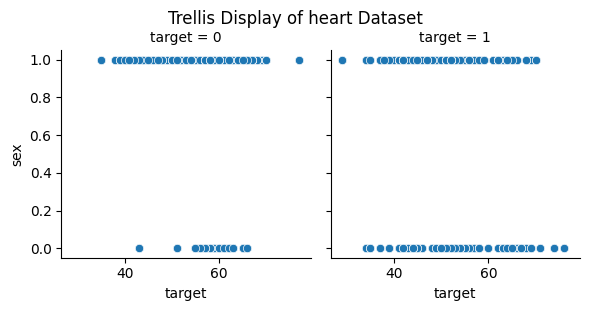

In [ ]:
# Create a Trellis Display with one categorical variable
g = sns.FacetGrid(penguins, col='target', margin_titles=True)
g.map_dataframe(sns.scatterplot, x='age', y='sex')
g.set_axis_labels('target', 'sex')
plt.suptitle('Trellis Display of heart Dataset', y=1.02)
plt.show()

here it is observal that two genders have different chance of having heart disease.

## Pixel-Oriented Techniques

*   Heat Map



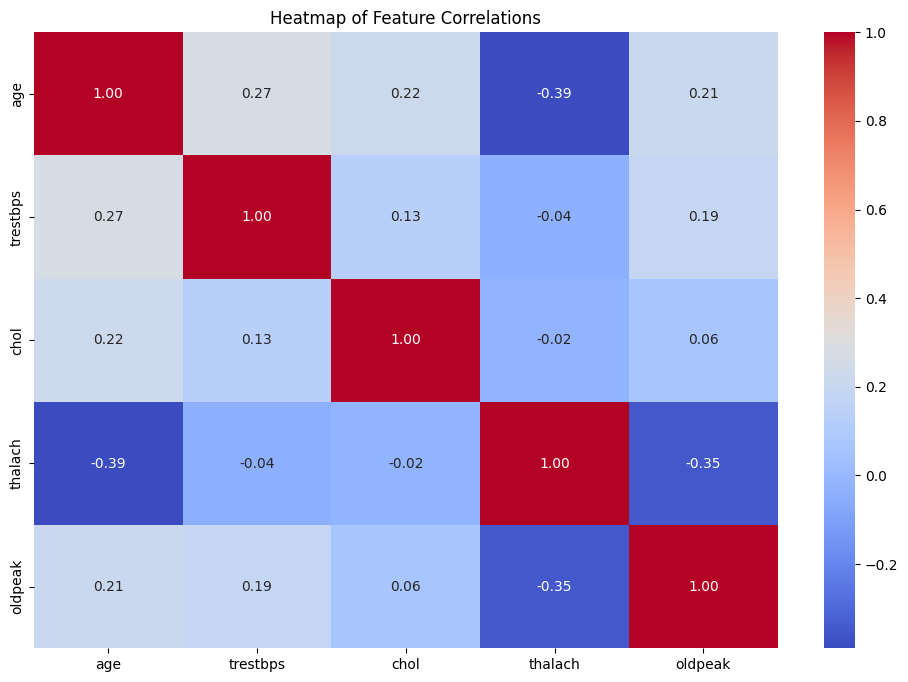

In [ ]:
# Assuming df is already loaded with the dataset
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

Here in this heatmap we can see that there are no strong negative or possitive relationships so we can conclude that the features are relatively independent of each other.


## Hierarchical Techniques
*   Dendrogram



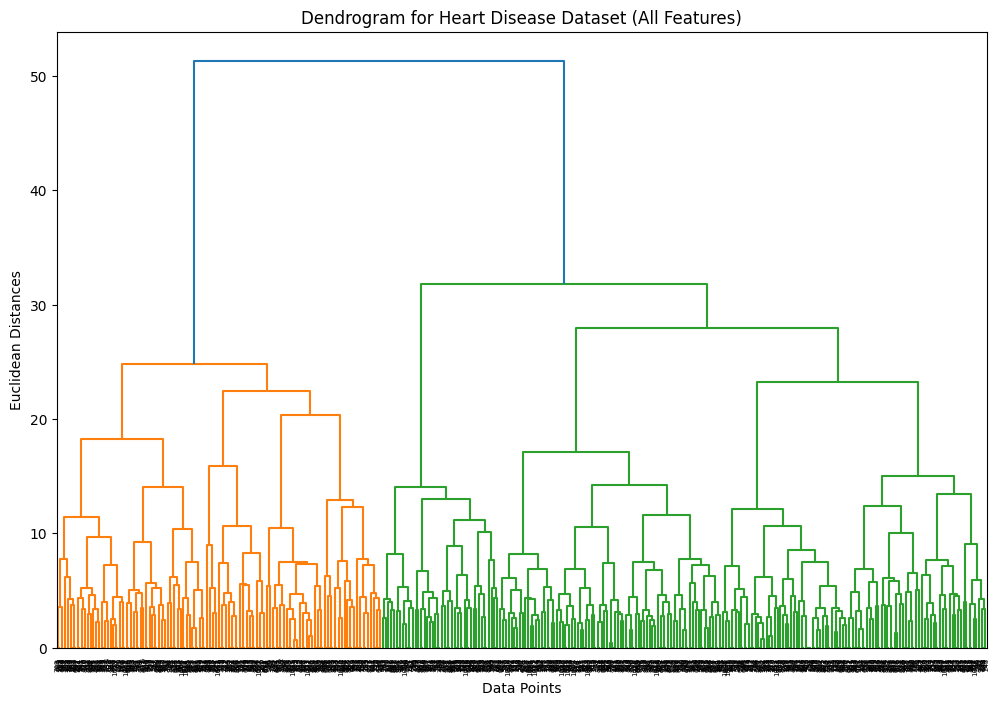

In [ ]:
# Separate numerical and categorical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])

# Combine scaled numerical features and raw categorical features
all_features = pd.concat(
    [pd.DataFrame(scaled_numerical, columns=numerical_features), df[categorical_features].reset_index(drop=True)],
    axis=1
)

# Generate the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage(all_features, method='ward'))
plt.title('Dendrogram for Heart Disease Dataset (All Features)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


In this dendogram we can see clearly it devided dataset into two clusters which means dataset can classiify into two classes.

According to the dataset it two clusters can be Having heart disease and Not having heart disease.

In [ ]:
# Get target colum from the
target_column = df['target']

# Add the target column to `all_features`
all_features_with_target = pd.concat([all_features, target_column.reset_index(drop=True)], axis=1)

# Rename the target column for clarity if needed
all_features_with_target.rename(columns={all_features_with_target.columns[-1]: 'target'}, inplace=True)

# Display the updated DataFrame
print(all_features_with_target.head())


        age  trestbps      chol   thalach   oldpeak  sex  cp  fbs  restecg  \
0 -0.268437 -0.377636 -0.659332  0.821321 -0.060888    1   0    0        1   
1 -0.158157  0.479107 -0.833861  0.255968  1.727137    1   0    1        0   
2  1.716595  0.764688 -1.396233 -1.048692  1.301417    1   0    0        1   
3  0.724079  0.936037 -0.833861  0.516900 -0.912329    1   0    0        1   
4  0.834359  0.364875  0.930822 -1.874977  0.705408    0   0    1        1   

   exang  slope  thal  target  
0      0      2     3       0  
1      1      0     3       0  
2      1      0     3       0  
3      0      2     3       0  
4      0      1     2       0  


## 2. Dividing Dataset

In [ ]:
# Features and target variable
X = all_features_with_target.drop(columns='target')
y = all_features_with_target['target']

# Split the dataset into training (80%) and testing (20%) subsets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)




## 3. Building two classification models

In [ ]:
# Model 1: Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Calculate accuracy for Logistic Regression
train_acc_lr = model_lr.score(X_train, y_train)
test_acc_lr = model_lr.score(X_test, y_test)


In [ ]:
# Model 2: Support Vector Machine
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

# Calculate accuracy for SVM
train_acc_svm = model_svm.score(X_train, y_train)
test_acc_svm = model_svm.score(X_test, y_test)


## 4. Calculating and reporting the training accuracy and testing accuracy

In [ ]:
# Report the results
print(f"Logistic Regression - Training Accuracy: {train_acc_lr:.4f}, Testing Accuracy: {test_acc_lr:.4f}")
print(f"SVM - Training Accuracy: {train_acc_svm:.4f}, Testing Accuracy: {test_acc_svm:.4f}")



Logistic Regression - Training Accuracy: 0.8305, Testing Accuracy: 0.7854
SVM - Training Accuracy: 0.9061, Testing Accuracy: 0.8537


## 5. Discussion on each model

Logistic regression model has 83.05% accuracy for training data and 78.54% accuracy for testing data.
Support Vector Machine model has 90.61% accuracy for training data and 85.37% for testing data.

Both models demonstrate good learning ability on the training data.
Lower testing accuracy indicates a minor drop in performance when applied to unseen data, which is typical for most models.

So here SVM model perform better than the Logistic regression model according to the accuracy values.

## 6. Calculating the absolute difference in test set accuracy between Model A and Model B

In [ ]:
# Calculate the absolute difference in test accuracy between the two models
accuracy_diff = abs(test_acc_lr - test_acc_svm)
print(f"Absolute difference in test accuracy: {accuracy_diff:.4f}")


Absolute difference in test accuracy: 0.0683


In [ ]:
# Get predictions as probabilities for Logistic Regression
model_lr_preds = model_lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Get binary predictions for Logistic Regression
model_lr_binary_preds = model_lr.predict(X_test)

# Get predictions for Support Vector Machine
model_svm_preds = model_svm.decision_function(X_test)  # Decision scores
model_svm_binary_preds = model_svm.predict(X_test)


# Actual labels from the test set
actual_labels = y_test.to_numpy()

# Display predictions and actual labels
print("Actual Labels:", actual_labels)

# Display predictions
print("Logistic Regression Predictions (Probabilities):", model_lr_preds)
print("Logistic Regression Predictions (Binary):", model_lr_binary_preds)
print("SVM Predictions (Decision Scores):", model_svm_preds)
print("SVM Predictions (Binary):", model_svm_binary_preds)


Actual Labels: [0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1]
Logistic Regression Predictions (Probabilities): [0.01595154 0.27648625 0.0193351  0.64952477 0.50558306 0.01950759
 0.79810385 0.63751532 0.94461998 0.27648625 0.75805836 0.85033725
 0.63751532 0.12096456 0.51829023 0.0213877  0.191708   0.10182502
 0.68516192 0.87352413 0.02432011 0.03773386 0.4197869  0.94132331
 0.70254801 0.97449836 0.12050026 0.12096456 0.68312617 0.01348122
 0.68036576 0.73174975 0.82038306 0.91307678 0.01422463 0.09812767
 0.60497972 0.12047283 0.51861027 0.96657183 0.0322383  0.95124808
 0.59924735 0.96657183 0.82670828 0.01691316 0.798

## 7. Permutation Test

P-value: 0.0010


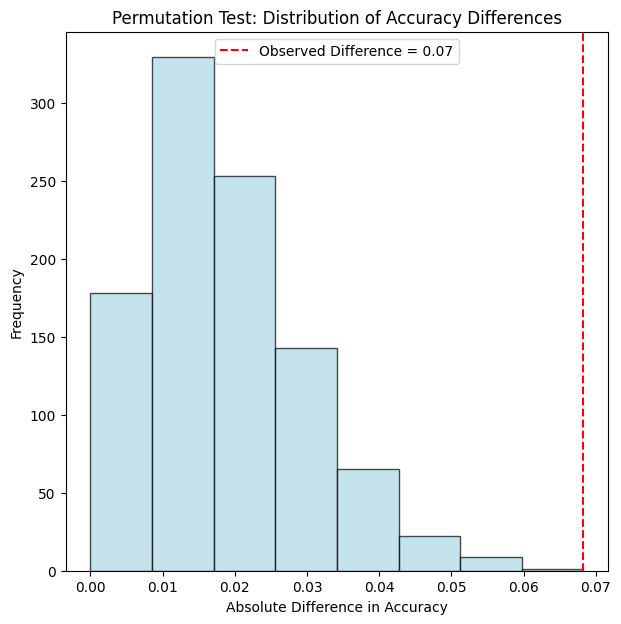

The observed accuracy difference is statistically significant (p < 0.05).


In [ ]:
# Calculate the absolute difference in accuracy
accuracy_a = accuracy_score(actual_labels, model_lr_binary_preds)
accuracy_b = accuracy_score(actual_labels, model_svm_binary_preds)
original_accuracy_difference = abs(accuracy_a - accuracy_b)

# Permutation Test
n_permutations = 1000
accuracy_differences_permute = []

# Combine predictions for permutation
combined_preds = np.array([model_lr_binary_preds, model_svm_binary_preds]).T

for _ in range(n_permutations):
    np.random.shuffle(combined_preds)  # Shuffle rows
    shuffled_a = combined_preds[:, 0]
    shuffled_b = combined_preds[:, 1]

    shuffled_accuracy_a = accuracy_score(actual_labels, shuffled_a)
    shuffled_accuracy_b = accuracy_score(actual_labels, shuffled_b)

    permuted_difference = abs(shuffled_accuracy_a - shuffled_accuracy_b)
    accuracy_differences_permute.append(permuted_difference)

# Calculate p-value
accuracy_differences_permute = np.array(accuracy_differences_permute)
p_value = np.mean(accuracy_differences_permute >= original_accuracy_difference)

print(f"P-value: {p_value:.4f}")

# Plot the permutation distribution
plt.figure(figsize=(7, 7))
plt.hist(accuracy_differences_permute, bins=8, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(original_accuracy_difference, color='red', linestyle='--', label=f'Observed Difference = {original_accuracy_difference:.2f}')
plt.title('Permutation Test: Distribution of Accuracy Differences')
plt.xlabel('Absolute Difference in Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conclusion
if p_value < 0.05:
    print("The observed accuracy difference is statistically significant (p < 0.05).")
else:
    print("The observed accuracy difference is not statistically significant (p >= 0.05).")

## Hypothesis for Permutation Test

H0: There is no difference in the performance between Model A and Model B.

H1: Model A performs better than Model B.

## Decision

P-value: 0.0010

Becuase of the p-value is less than the significance level, alpha = 0.05 , reject the null hypothesis.

That means Logistic Regression model performance is significanly different from SVM model.


accuracy_b(0.8537) > accuracy_a(0.7854)


SVM performs better because it has a higher accuracy, and the statistical test confirms that the difference is significant.